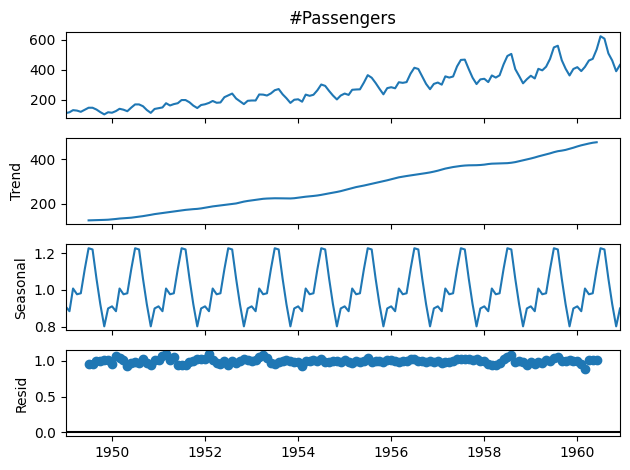

In [ ]:
# Question 6: Time Series Decomposition (AirPassengers)
# Answer :
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

data = pd.read_csv("AirPassengers.csv")
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

result = seasonal_decompose(data['#Passengers'], model='multiplicative')

result.plot()
plt.show()

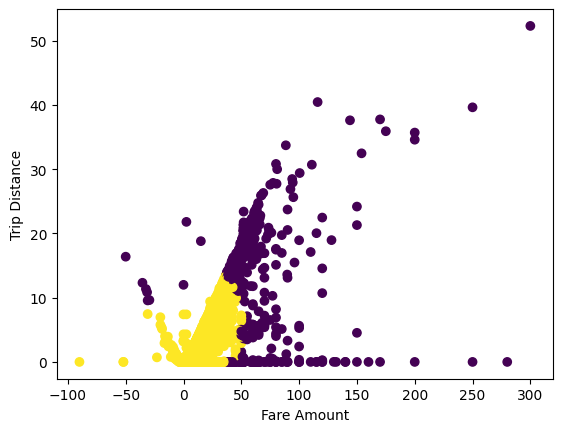

In [ ]:
# Question 7: Isolation Forest on NYC Taxi Fare
# Answer :
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("NYC_taxi_fare_data.csv")
X = data[['fare_amount', 'trip_distance']]

model = IsolationForest(contamination=0.02)
data['anomaly'] = model.fit_predict(X)

plt.scatter(data['fare_amount'], data['trip_distance'],
            c=data['anomaly'])
plt.xlabel("Fare Amount")
plt.ylabel("Trip Distance")
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


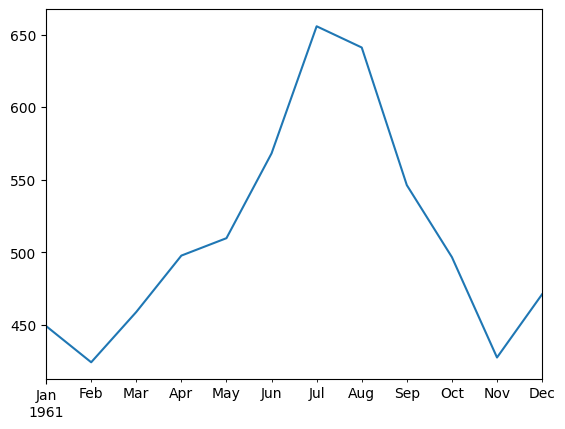

In [ ]:
#Question 8: Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results.

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load AirPassengers data - Ensuring 'data' is the correct dataset
data = pd.read_csv("AirPassengers.csv")
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

model = SARIMAX(data['#Passengers'],
                order=(1,1,1),
                seasonal_order=(1,1,1,12))
results = model.fit()

forecast = results.forecast(12)
forecast.plot()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


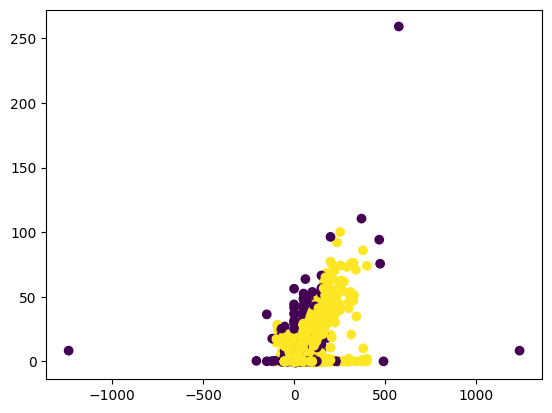

In [ ]:
# Question 9: Local Outlier Factor (LOF)
# Answer :
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd
import matplotlib.pyplot as plt

# Reload NYC Taxi Fare data
data = pd.read_csv("NYC_taxi_fare_data.csv")

# Drop rows with NaN values based on the columns used for LOF directly from 'data'
# This ensures 'data' and any subsequent 'X' derived from it have consistent rows.
data.dropna(subset=['fare_amount', 'trip_distance'], inplace=True)

# Now define X from the cleaned data
X = data[['fare_amount', 'trip_distance']]

lof = LocalOutlierFactor(n_neighbors=20)
data['lof'] = lof.fit_predict(X)

plt.scatter(data['fare_amount'], data['trip_distance'],
            c=data['lof'])
plt.show()

/tmp/ipython-input-1412445732.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_resampled = data[['fare_amount', 'trip_distance']].resample('H').mean().dropna()
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/sta

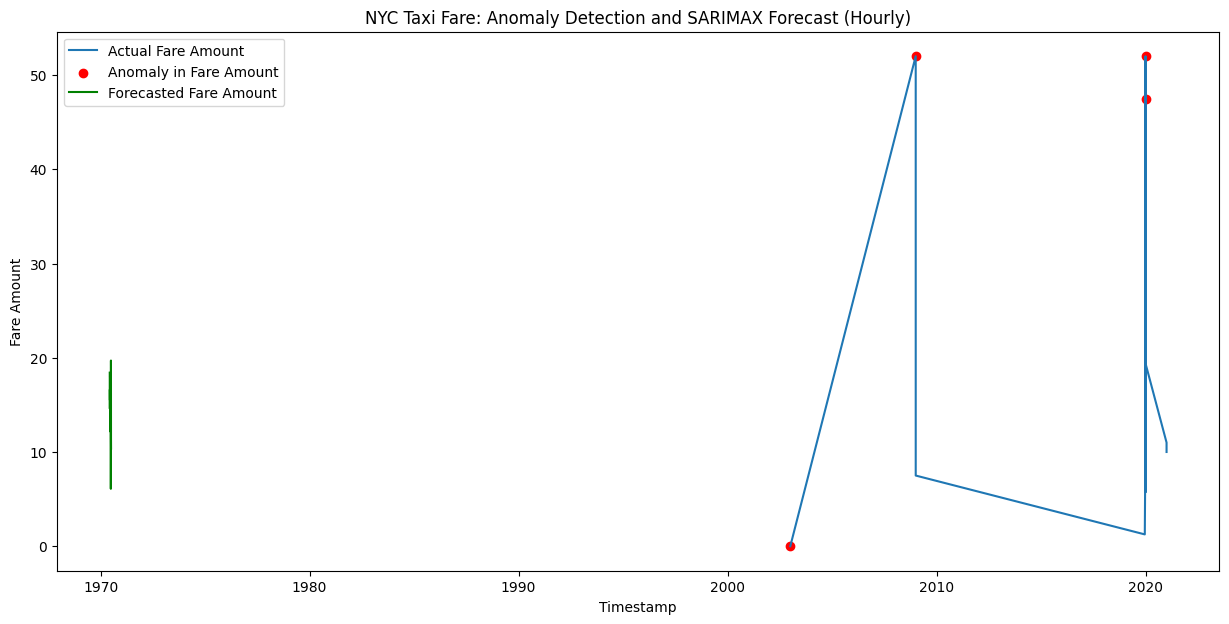

In [ ]:
# Question 10: Real-Time Power Grid Workflow adapted for NYC Taxi Fare Data
# Answer:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load data
data = pd.read_csv("NYC_taxi_fare_data.csv")

# Convert 'tpep_pickup_datetime' to datetime and set as index
data['timestamp'] = pd.to_datetime(data['tpep_pickup_datetime'])
data.set_index('timestamp', inplace=True)

# Select relevant columns and resample to hourly frequency
# Drop NaNs before resampling to avoid issues, or handle them during resampling
data_resampled = data[['fare_amount', 'trip_distance']].resample('H').mean().dropna()

# Anomaly Detection
iso = IsolationForest(contamination=0.02, random_state=42)
data_resampled['anomaly'] = iso.fit_predict(data_resampled[['fare_amount', 'trip_distance']])

# Forecasting
# Using 'fare_amount' as the primary series and 'trip_distance' as exogenous variable
# Adjusted seasonal_order for hourly data (24 for daily seasonality)
model = SARIMAX(data_resampled['fare_amount'],
                exog=data_resampled[['trip_distance']],
                order=(1,1,1),
                seasonal_order=(1,1,1,24)) # Assuming daily seasonality (24 hours)
results = model.fit()

# Forecast for the next 24 hours
# Ensure exogenous variables for forecast match the number of steps and are from the correct dataframe
forecast_exog = data_resampled[['trip_distance']].iloc[-24:] # Use the last 24 hours of trip_distance for forecasting
forecast = results.forecast(24, exog=forecast_exog)

# Visualization
plt.figure(figsize=(15, 7))
plt.plot(data_resampled['fare_amount'], label="Actual Fare Amount")
plt.scatter(data_resampled[data_resampled['anomaly']==-1].index,
            data_resampled[data_resampled['anomaly']==-1]['fare_amount'],
            color='red', label="Anomaly in Fare Amount")
plt.plot(forecast, label="Forecasted Fare Amount", color="green")
plt.title("NYC Taxi Fare: Anomaly Detection and SARIMAX Forecast (Hourly)")
plt.xlabel("Timestamp")
plt.ylabel("Fare Amount")
plt.legend()
plt.show()